In [1]:
import pandas as pd
import numpy as np



In [2]:
# 1) show which Python the notebook is using and whether openpyxl is importable
import sys, importlib
print("sys.executable:", sys.executable)
print("sys.version:", sys.version.splitlines()[0])
print("openpyxl spec:", importlib.util.find_spec("openpyxl"))

# 2) install openpyxl into this interpreter (safe)
%pip install --quiet openpyxl

# 3) confirm import
import importlib, sys as _sys
_spec = importlib.util.find_spec("openpyxl")
print("openpyxl now:", _spec)
try:
    import openpyxl
    print("openpyxl version:", openpyxl.__version__)
except Exception as e:
    print("import failed:", type(e).__name__, e)


sys.executable: /opt/anaconda3/envs/la_liga/bin/python
sys.version: 3.11.13 (main, Jun  5 2025, 08:21:08) [Clang 14.0.6 ]
openpyxl spec: ModuleSpec(name='openpyxl', loader=<_frozen_importlib_external.SourceFileLoader object at 0x107725a90>, origin='/opt/anaconda3/envs/la_liga/lib/python3.11/site-packages/openpyxl/__init__.py', submodule_search_locations=['/opt/anaconda3/envs/la_liga/lib/python3.11/site-packages/openpyxl'])
Note: you may need to restart the kernel to use updated packages.
openpyxl now: ModuleSpec(name='openpyxl', loader=<_frozen_importlib_external.SourceFileLoader object at 0x11771e050>, origin='/opt/anaconda3/envs/la_liga/lib/python3.11/site-packages/openpyxl/__init__.py', submodule_search_locations=['/opt/anaconda3/envs/la_liga/lib/python3.11/site-packages/openpyxl'])
openpyxl version: 3.1.5


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

In [4]:
df_airbnb = pd.read_excel('Airbnb_listings_Mtl_June_2025.xlsx')


In [5]:
df_raw = df_airbnb.copy() #create copy of og df before dropping columns
print(df_raw.shape)

(9737, 72)


In [6]:
print(df_airbnb.shape)
print(len(df_airbnb.columns))
print(df_airbnb.columns)

(9737, 72)
72
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time_hours', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_highlights', 'neighbourhood_name', 'latitude',
       'longitude', 'property_type', 'room_type', 'nbr_accommodates',
       'bathrooms_nbr', 'bathrooms_text', 'nbr_bedrooms', 'nbr_beds',
       'list_amenities', 'Unnamed: 39', 'price_CAD', 'minimum_nights',
       'maximum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'calendar_last_scraped', 'n

In [7]:
#Dropping columns that are not needed 
df_airbnb = df_airbnb.drop(columns=[
    "listing_url",
    "scrape_id",
    "last_scraped",
    "source",
    "name",
    "description",
    'neighborhood_overview',
    "picture_url",
    "host_url",
    "host_name",
    "host_location",
    "host_about",
    "host_thumbnail_url",
    "host_picture_url",
    "host_neighbourhood",
    "calendar_last_scraped",
    'Unnamed: 39'
], axis=1)

In [8]:
print(df_airbnb.shape)


(9737, 55)


## Dealings with NaNs


In [9]:
df_airbnb.isna().sum().sort_values(ascending=False)

neighbourhood_highlights                        5447
license                                         4481
review_scores_checkin                           1849
review_scores_cleanliness                       1849
review_scores_accuracy                          1849
review_scores_value                             1849
review_scores_location                          1849
review_scores_communication                     1849
first_review                                    1848
last_review                                     1848
review_scores_rating                            1848
reviews_per_month                               1848
host_response_rate                              1006
host_response_time_hours                        1006
bathrooms_nbr                                    963
nbr_beds                                         962
estimated_revenue_l365d                          959
price_CAD                                        959
host_acceptance_rate                          

In [10]:
#drop neighbourhood_highlights column as it has too many NaN values
df_airbnb = df_airbnb.drop(columns=['neighbourhood_highlights'], axis=1)

In [11]:
#Remove rows with NaN values in columns that have less than 5% of the total number of rows (<487 rows)
threshold = 0.05 * len(df_airbnb)
cols_with_rows_to_drop = [col for col in df_airbnb.columns if df_airbnb[col].isna().sum()< threshold]
df_airbnb = df_airbnb.dropna(subset=cols_with_rows_to_drop)

In [12]:
print(threshold)

486.85


In [13]:
df_airbnb.isna().sum().sort_values(ascending=False)

license                                         4119
review_scores_cleanliness                       1639
review_scores_accuracy                          1639
review_scores_checkin                           1639
review_scores_communication                     1639
review_scores_location                          1639
review_scores_value                             1639
first_review                                    1638
last_review                                     1638
review_scores_rating                            1638
reviews_per_month                               1638
host_response_rate                               856
host_response_time_hours                         856
nbr_beds                                         754
bathrooms_nbr                                    751
estimated_revenue_l365d                          751
price_CAD                                        751
host_acceptance_rate                             727
instant_bookable                              

In [14]:
#Dealing with NaN values in license column
df_airbnb['has_license']=(~df_airbnb['license'].isna()).astype(int) #if isna() is True, then ~ makes it False which is int = 0, else 1
df_airbnb = df_airbnb.drop(columns=['license'], axis=1) #drop license



In [15]:
df_airbnb.isna().sum().sort_values(ascending=False)

review_scores_cleanliness                       1639
review_scores_location                          1639
review_scores_accuracy                          1639
review_scores_checkin                           1639
review_scores_communication                     1639
review_scores_value                             1639
reviews_per_month                               1638
review_scores_rating                            1638
last_review                                     1638
first_review                                    1638
host_response_rate                               856
host_response_time_hours                         856
nbr_beds                                         754
estimated_revenue_l365d                          751
price_CAD                                        751
bathrooms_nbr                                    751
host_acceptance_rate                             727
nbr_of_reviews_ltm                                 0
nbr_of_reviews_l30d                           

In [16]:
#Dealing with NaN values in review_scores_rating column
df_airbnb['review_scores_rating'] = df_airbnb['review_scores_rating'].fillna(0)
df_airbnb['has_review'] = (df_airbnb['review_scores_rating'] > 0).astype(int) #if review_scores_rating is greater than 0, then has_review is 1, else 0
print(df_airbnb['has_review'].value_counts())

has_review
1    7356
0    1638
Name: count, dtype: int64


In [17]:
df_airbnb.isna().sum().sort_values(ascending=False)#check if there are still NaN values in review_scores_rating column

review_scores_checkin                           1639
review_scores_value                             1639
review_scores_accuracy                          1639
review_scores_cleanliness                       1639
review_scores_communication                     1639
review_scores_location                          1639
reviews_per_month                               1638
first_review                                    1638
last_review                                     1638
host_response_time_hours                         856
host_response_rate                               856
nbr_beds                                         754
price_CAD                                        751
bathrooms_nbr                                    751
estimated_revenue_l365d                          751
host_acceptance_rate                             727
estimated_occupancy_l365d                          0
nbr_of_reviews_ly                                  0
availability_eoy                              

In [18]:
df_airbnb['reviews_per_month'] = df_airbnb['reviews_per_month'].fillna(0) #fill NaN values with 0 in reviews_per_month column

In [19]:
#Dropping 
cols_reviews_to_drop = ['review_scores_checkin',
                        'review_scores_accuracy',
                        'review_scores_cleanliness',
                        'review_scores_communication',
                        'review_scores_location', 
                        'review_scores_value',
                        'first_review',
                        'last_review']
df_airbnb = df_airbnb.drop(columns=[col for col in cols_reviews_to_drop if col in df_airbnb.columns], axis=1) 


In [20]:
df_airbnb.isna().sum().sort_values(ascending=False)

host_response_time_hours                        856
host_response_rate                              856
nbr_beds                                        754
price_CAD                                       751
bathrooms_nbr                                   751
estimated_revenue_l365d                         751
host_acceptance_rate                            727
reviews_per_month                                 0
calculated_host_listings_count_shared_rooms       0
availability_60                                   0
availability_90                                   0
availability_365                                  0
has_license                                       0
nbr_of_reviews                                    0
nbr_of_reviews_ltm                                0
nbr_of_reviews_l30d                               0
availability_eoy                                  0
nbr_of_reviews_ly                                 0
estimated_occupancy_l365d                         0
has_availabi

In [21]:
#drop missing rows from price_CAD as its the target variable
df_airbnb = df_airbnb.dropna(subset=['price_CAD'])



In [22]:
#This is calcuilated with price which is the target variable, so we drop it (leakage)
df_airbnb = df_airbnb.drop(columns = ['estimated_revenue_l365d'], axis =1)

In [23]:
#Impute number of bathrooms and beds with median values
df_airbnb["bathrooms_nbr"] = df_airbnb["bathrooms_nbr"].fillna(df_airbnb["bathrooms_nbr"].median())
df_airbnb["nbr_beds"] = df_airbnb["nbr_beds"].fillna(df_airbnb["nbr_beds"].median())


In [24]:
#Imputing host resonse columns with median for linear regression model but also creating missing columns to indicate if the value was missing or not
df_airbnb["host_response_rate_missing"] = df_airbnb["host_response_rate"].isna().astype(int)
df_airbnb["host_response_rate"] = df_airbnb["host_response_rate"].fillna(df_airbnb["host_response_rate"].median())

df_airbnb["host_response_time_missing"] = df_airbnb["host_response_time_hours"].isna().astype(int)
df_airbnb["host_response_time_hours"] = df_airbnb["host_response_time_hours"].fillna(df_airbnb["host_response_time_hours"].median())

df_airbnb["host_acceptance_rate_missing"] = df_airbnb["host_acceptance_rate"].isna().astype(int)
df_airbnb["host_acceptance_rate"] = df_airbnb["host_acceptance_rate"].fillna(df_airbnb["host_acceptance_rate"].median())


In [25]:
df_airbnb.isna().sum().sort_values(ascending=False)

id                                              0
maximum_nights                                  0
availability_30                                 0
availability_60                                 0
availability_90                                 0
availability_365                                0
nbr_of_reviews                                  0
nbr_of_reviews_ltm                              0
nbr_of_reviews_l30d                             0
availability_eoy                                0
nbr_of_reviews_ly                               0
estimated_occupancy_l365d                       0
review_scores_rating                            0
instant_bookable                                0
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
has_license                                     0


## Changing/creating columns 

In [26]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8243 entries, 0 to 9735
Data columns (total 49 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            8243 non-null   int64         
 1   host_id                                       8243 non-null   int64         
 2   host_since                                    8243 non-null   datetime64[ns]
 3   host_response_time_hours                      8243 non-null   float64       
 4   host_response_rate                            8243 non-null   float64       
 5   host_acceptance_rate                          8243 non-null   float64       
 6   host_is_superhost                             8243 non-null   float64       
 7   host_listings_count                           8243 non-null   int64         
 8   host_total_listings_count                     8243 non-null   int64      

In [27]:
type(df_airbnb["list_amenities"].iloc[0]) #first element in list_amenities column is of type string

str

In [28]:
df_airbnb['list_amenities'].apply(type).value_counts() #list_amenities is of type string, not list

list_amenities
<class 'str'>    8243
Name: count, dtype: int64

In [29]:
import unicodedata #convert weird formatting in list_amenities to normal formatted string 
s = df_airbnb['list_amenities'].astype(str).apply(lambda x: unicodedata.normalize('NFKD', x))

#creating nbr_amenities column
df_airbnb['nbr_amenities'] = s.str.count(',') + 1 #count number of commas and add 1 to get number of amenities
df_airbnb[['nbr_amenities', 'list_amenities']].head()




,nbr_amenities,list_amenities
0,58,"[""Hair dryer"", ""Hot water kettle"", ""Crib - ava..."
1,68,"[""Hair dryer"", ""Hot water kettle"", ""Coffee mak..."
2,29,"[""Hair dryer"", ""Wifi"", ""Indoor fireplace"", ""Pa..."
3,21,"[""Hair dryer"", ""Wifi"", ""Patio or balcony"", ""Dr..."
4,49,"[""Hair dryer"", ""Hot water kettle"", ""Clothing s..."


In [30]:
print('Min number of amenities: ', df_airbnb['nbr_amenities'].min())
min_nbr_amenities_index = df_airbnb['nbr_amenities'].idxmin()
print('Row with minimum number of amenities:\n', df_airbnb.loc[min_nbr_amenities_index])
                                                  


Min number of amenities:  1
Row with minimum number of amenities:
 id                                                              1767393
host_id                                                         1020994
host_since                                          2011-08-25 00:00:00
host_response_time_hours                                            4.0
host_response_rate                                                  0.8
host_acceptance_rate                                                0.5
host_is_superhost                                                   0.0
host_listings_count                                                   7
host_total_listings_count                                            16
host_verifications                                   ['email', 'phone']
host_has_profile_pic                                                  1
host_identity_verified                                                1
neighbourhood_name                                         Le Sud-Oue

In [31]:
amenities_to_check = [
    "sauna", "gym", "air conditioning", "heating", "free parking",
    "pool", "hot tub", "balcony", "fireplace", "elevator", "view", "dishwasher"
]

amenities_count = {
    amenity: df_airbnb["list_amenities"].str.lower().str.contains(amenity).sum()
    for amenity in amenities_to_check
}

print(amenities_count)


{'sauna': np.int64(419), 'gym': np.int64(1085), 'air conditioning': np.int64(5900), 'heating': np.int64(7471), 'free parking': np.int64(1684), 'pool': np.int64(1185), 'hot tub': np.int64(592), 'balcony': np.int64(3347), 'fireplace': np.int64(450), 'elevator': np.int64(2018), 'view': np.int64(927), 'dishwasher': np.int64(4395)}


In [32]:
amenities_to_check = [
    "sauna", "gym", "air conditioning", "heating", "free parking",
    "pool", "hot tub", "balcony", "fireplace", "elevator", "view", "dishwasher"
]

for amenity in amenities_to_check:
    colname = "has_" + amenity.replace(" ", "_")
    df_airbnb[colname] = (
        df_airbnb["list_amenities"]
        .str.lower()
        .str.contains(amenity, na=False)
        .astype(int)
    )


In [33]:
df_airbnb['has_sauna'].value_counts()

has_sauna
0    7824
1     419
Name: count, dtype: int64

In [34]:
#convert room type to binary flag
df_airbnb['is_entire_place'] = df_airbnb['room_type'].str.contains('entire', case = False, na = False).astype(int)
df_airbnb['is_private_room'] = df_airbnb['room_type'].str.contains('private', case = False, na=False).astype(int)

#case = False makes it case insensitive, na = False makes NaN values False

In [35]:
print(df_airbnb['is_entire_place'].value_counts())
print(df_airbnb['is_entire_place'].head())
print(df_airbnb['is_private_room'].value_counts())
print(df_airbnb['is_private_room'].head())

is_entire_place
1    6880
0    1363
Name: count, dtype: int64
0    1
1    1
2    1
3    0
4    1
Name: is_entire_place, dtype: int64
is_private_room
0    6911
1    1332
Name: count, dtype: int64
0    0
1    0
2    0
3    1
4    0
Name: is_private_room, dtype: int64


In [36]:
df_airbnb.shape #6880+1363 = 6911 + 1332 = 8243 rows now

(8243, 64)

In [37]:
df_airbnb['has_license'].head()

0    1
1    1
2    0
3    0
4    1
Name: has_license, dtype: int64

In [38]:
df_airbnb['bathrooms_text'].head()

0           1 bath
1           1 bath
2           1 bath
3    1 shared bath
4           1 bath
Name: bathrooms_text, dtype: object

In [39]:
#Creating is_shared_bath from bathrooms_text column
df_airbnb['has_shared_bath'] = df_airbnb['bathrooms_text'].str.contains('shared', case = False, na = False).astype(int)
print(df_airbnb['has_shared_bath'].value_counts())

has_shared_bath
0    7363
1     880
Name: count, dtype: int64


In [40]:
#dropping bathrooms_text column
df_airbnb = df_airbnb.drop(columns=['bathrooms_text'])

In [41]:
df_airbnb = df_airbnb.rename(columns={'bathrooms_nbr': 'nbr_bathrooms'})

In [42]:
#Creating a column to calculate distance from airbnb to Place Ville Marie (to see how close listing is to downtown Mtl)
from math import radians, cos, sin, asin, sqrt

#Calculate distance between two lat/lon points using Haversine formula
#lat/lon of Place Ville Marie: 45.4987, -73.5704
def haversine_dist(lon1, lat1, lon2, lat2):
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 
    return c * r

PVM_LAT = 45.4987
PVM_LONG = -73.5704 
df_airbnb['dist_to_PVM_km'] = df_airbnb.apply(lambda row: haversine_dist(row['longitude'], row['latitude'], PVM_LONG, PVM_LAT), axis=1)

In [43]:
df_airbnb['dist_to_PVM_km'].min()

0.09107718899586024

In [44]:
#Creating host_years column to see how long host has been hosting (in years)
df_airbnb['hosting_years'] =(pd.to_datetime('2025-06-15') - pd.to_datetime(df_airbnb['host_since'])).dt.days/365 

In [45]:
df_airbnb['hosting_years'].head()

0    15.098630
1    15.098630
2    14.361644
3    14.939726
4    14.769863
Name: hosting_years, dtype: float64

In [46]:
df_airbnb.columns

Index(['id', 'host_id', 'host_since', 'host_response_time_hours',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_name', 'latitude', 'longitude', 'property_type',
       'room_type', 'nbr_accommodates', 'nbr_bathrooms', 'nbr_bedrooms',
       'nbr_beds', 'list_amenities', 'price_CAD', 'minimum_nights',
       'maximum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'nbr_of_reviews', 'nbr_of_reviews_ltm', 'nbr_of_reviews_l30d',
       'availability_eoy', 'nbr_of_reviews_ly', 'estimated_occupancy_l365d',
       'review_scores_rating', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_

In [47]:
#duplicate hosts can lead to data leakage of host features (host_since, host_total_listings_count, host_years, host_response_rate, host_response_time_hours, host_acceptance_rate, host_is_superhost) do should do GroupKFold on host_id so no host appears in train and test sets
duplicate_hosts = df_airbnb['host_id'].value_counts().sort_values(ascending=False)
duplicate_hosts = duplicate_hosts[duplicate_hosts > 1]
print(len(duplicate_hosts))
print(duplicate_hosts.head(20))

1045
host_id
195501369    104
117827514    100
195649860     79
4365710       75
9818417       73
487327        72
434955825     57
73995257      47
306041574     46
224865057     45
219345292     44
146743514     43
408542876     39
594097140     39
284489108     38
15200840      36
39844170      34
562724979     34
563241057     34
274170499     33
Name: count, dtype: int64


## Outliers

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt



In [49]:
df_airbnb.columns

Index(['id', 'host_id', 'host_since', 'host_response_time_hours',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_name', 'latitude', 'longitude', 'property_type',
       'room_type', 'nbr_accommodates', 'nbr_bathrooms', 'nbr_bedrooms',
       'nbr_beds', 'list_amenities', 'price_CAD', 'minimum_nights',
       'maximum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'nbr_of_reviews', 'nbr_of_reviews_ltm', 'nbr_of_reviews_l30d',
       'availability_eoy', 'nbr_of_reviews_ly', 'estimated_occupancy_l365d',
       'review_scores_rating', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_

In [50]:
df_airbnb.describe()

,id,host_id,host_since,host_response_time_hours,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,nbr_accommodates,nbr_bathrooms,nbr_bedrooms,nbr_beds,price_CAD,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,nbr_of_reviews,nbr_of_reviews_ltm,nbr_of_reviews_l30d,availability_eoy,nbr_of_reviews_ly,estimated_occupancy_l365d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,has_license,has_review,host_response_rate_missing,host_response_time_missing,host_acceptance_rate_missing,nbr_amenities,has_sauna,has_gym,has_air_conditioning,has_heating,has_free_parking,has_pool,has_hot_tub,has_balcony,has_fireplace,has_elevator,has_view,has_dishwasher,is_entire_place,is_private_room,has_shared_bath,dist_to_PVM_km,hosting_years
count,8.243000e+03,8.243000e+03,8243,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.0,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000
mean,7.595416e+17,2.528631e+08,2018-09-02 21:17:53.055926272,3.873954,0.963434,0.898818,0.400218,18.538032,26.325610,0.976222,0.944923,45.511357,-73.587211,3.877714,1.225403,1.586194,2.082979,188.872255,21.869586,461.178576,1.0,11.619313,27.168385,45.695135,200.140847,43.160985,12.927939,1.174451,107.822880,11.627805,103.551498,3.894509,0.392818,15.857333,13.826398,1.986898,0.026568,1.462457,0.559384,0.824214,0.085406,0.085406,0.078612,36.954264,0.050831,0.131627,0.715759,0.906345,0.204295,0.143758,0.071819,0.406041,0.054592,0.244814,0.112459,0.533180,0.834648,0.161592,0.106757,3.965419,6.786610
min,2.905900e+04,3.560600e+04,2009-09-02 00:00:00,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,45.405470,-73.947310,1.000000,0.000000,0.000000,0.000000,11.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.091077,0.024658
25%,4.975974e+07,3.532928e+07,2015-06-19 12:00:00,1.000000,1.000000,0.880000,0.000000,2.000000,3.000000,1.000000,1.000000,45.494745,-73.598235,2.000000,1.000000,1.000000,1.000000,86.000000,2.000000,365.000000,1.0,1.000000,8.500000,22.000000,99.000000,2.000000,0.000000,0.000000,56.000000,0.000000,0.000000,4.330000,0.000000,1.000000,1.000000,0.000000,0.000000,0.110000,0.000000,1.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.336948,3.060274
50%,9.174509e+17,1.956499e+08,2018-06-14 00:00:00,1.000000,1.000000,0.990000,0.000000,6.000000,8.000000,1.000000,1.000000,45.510883,-73.575465,3.000000,1.000000,1.000000,2.000000,133.000000,31.000000,365.000000,1.0,9.000000,25.000000,47.000000,210.000000,10.000000,3.000000,0.000000,119.000000,2.000000,64.000000,4.780000,0.000000,5.000000,3.000000,0.000000,0.000000,0.640000,1.000000,1.000000,0.000000,0.000000,0.000000,38.000000,0.000000,0.00000

In [51]:
df_airbnb['price_CAD'].describe()

count     8243.000000
mean       188.872255
std        303.443699
min         11.000000
25%         86.000000
50%        133.000000
75%        208.000000
max      13294.000000
Name: price_CAD, dtype: float64

<Axes: xlabel='price_CAD'>

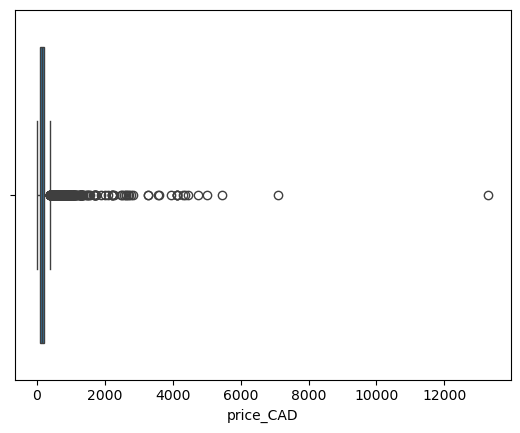

In [52]:
sns.boxplot(x=df_airbnb['price_CAD']) #listing with price of over 12000$

In [53]:
df_airbnb[df_airbnb['price_CAD'] > 12000]

,id,host_id,host_since,host_response_time_hours,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_name,latitude,longitude,property_type,room_type,nbr_accommodates,nbr_bathrooms,nbr_bedrooms,nbr_beds,list_amenities,price_CAD,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,nbr_of_reviews,nbr_of_reviews_ltm,nbr_of_reviews_l30d,availability_eoy,nbr_of_reviews_ly,estimated_occupancy_l365d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,has_license,has_review,host_response_rate_missing,host_response_time_missing,host_acceptance_rate_missing,nbr_amenities,has_sauna,has_gym,has_air_conditioning,has_heating,has_free_parking,has_pool,has_hot_tub,has_balcony,has_fireplace,has_elevator,has_view,has_dishwasher,is_entire_place,is_private_room,has_shared_bath,dist_to_PVM_km,hosting_years
22,190003,640693,2011-05-29,1.0,1.0,0.99,0.0,2,5,"['email', 'phone']",1,1,Le Plateau-Mont-Royal,45.51937,-73.56999,Private room in rental unit,Private room,2,1.0,1.0,1.0,"[""Free parking on premises"", ""Wifi"", ""Heating""...",13294.0,99,9999,1.0,30,60,90,365,1,0,0,189,0,0,5.0,0,1,0,1,0,0.01,0,1,1,1,1,7,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,2.298621,14.057534


In [54]:
df_airbnb = df_airbnb[df_airbnb['price_CAD'] <= 12000] #removing outlier listing with price over 12000$

In [55]:
df_airbnb[df_airbnb['price_CAD'] > 6000]

,id,host_id,host_since,host_response_time_hours,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_name,latitude,longitude,property_type,room_type,nbr_accommodates,nbr_bathrooms,nbr_bedrooms,nbr_beds,list_amenities,price_CAD,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,nbr_of_reviews,nbr_of_reviews_ltm,nbr_of_reviews_l30d,availability_eoy,nbr_of_reviews_ly,estimated_occupancy_l365d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,has_license,has_review,host_response_rate_missing,host_response_time_missing,host_acceptance_rate_missing,nbr_amenities,has_sauna,has_gym,has_air_conditioning,has_heating,has_free_parking,has_pool,has_hot_tub,has_balcony,has_fireplace,has_elevator,has_view,has_dishwasher,is_entire_place,is_private_room,has_shared_bath,dist_to_PVM_km,hosting_years
7394,1234354023480878421,419217577,2021-08-19,1.0,1.0,1.0,0.0,2,2,['phone'],1,1,Mont-Royal,45.520465,-73.629544,Private room in rental unit,Private room,1,0.5,1.0,1.0,"[""Lock on bedroom door"", ""Wifi"", ""Air conditio...",7110.0,31,365,1.0,30,60,90,365,0,0,0,190,0,0,0.0,0,1,0,1,0,0.0,0,0,1,1,0,8,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5.205547,3.824658


In [56]:
df_airbnb = df_airbnb[df_airbnb['price_CAD'] <= 6000] #removing outlier listing with price over 6000$

<Axes: xlabel='price_CAD'>

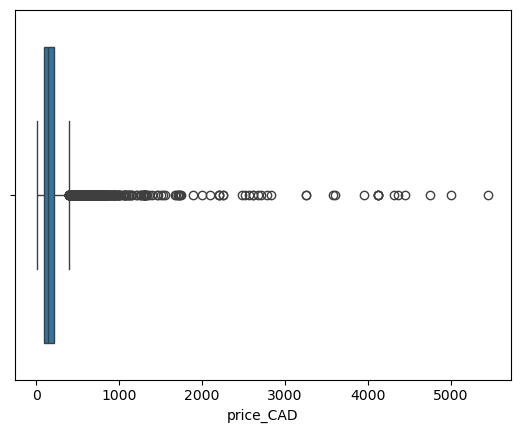

In [57]:
sns.boxplot(x=df_airbnb['price_CAD']) #boxplot after removing obvious outliers

In [58]:
Q1_price = df_airbnb['price_CAD'].quantile(0.25) 
print('q1', Q1_price)
Q3_price = df_airbnb['price_CAD'].quantile(0.75)
print('q3', Q3_price)
IQR_price = Q3_price - Q1_price
print('iqr', IQR_price)
lower_bound_price = Q1_price - 1.5 * IQR_price
print('lower bound', lower_bound_price)
upper_bound_price = Q3_price + 1.5 * IQR_price 
print('upper bound', upper_bound_price)

outliers_price = df_airbnb[(df_airbnb['price_CAD'] < lower_bound_price) | (df_airbnb['price_CAD'] > upper_bound_price)]
print(f"Number of outliers in price_CAD: {len(outliers_price)}")

outliers_price[['price_CAD', 'nbr_bedrooms', 'nbr_bathrooms']].head()

q1 86.0
q3 208.0
iqr 122.0
lower bound -97.0
upper bound 391.0
Number of outliers in price_CAD: 566


,price_CAD,nbr_bedrooms,nbr_bathrooms
8,417.0,3.0,2.5
64,429.0,3.0,1.0
87,628.0,4.0,2.0
116,472.0,3.0,2.0
134,643.0,3.0,1.0


<Axes: xlabel='price_CAD'>

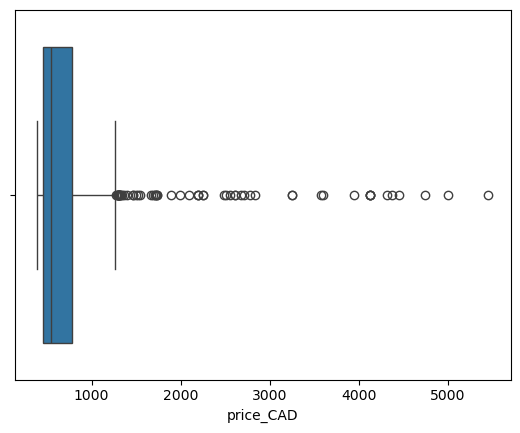

In [59]:
sns.boxplot(x=outliers_price['price_CAD']) #there are outliers in the outliers (price > 1000$)

In [60]:
outliers_price.describe()

,id,host_id,host_since,host_response_time_hours,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,nbr_accommodates,nbr_bathrooms,nbr_bedrooms,nbr_beds,price_CAD,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,nbr_of_reviews,nbr_of_reviews_ltm,nbr_of_reviews_l30d,availability_eoy,nbr_of_reviews_ly,estimated_occupancy_l365d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,has_license,has_review,host_response_rate_missing,host_response_time_missing,host_acceptance_rate_missing,nbr_amenities,has_sauna,has_gym,has_air_conditioning,has_heating,has_free_parking,has_pool,has_hot_tub,has_balcony,has_fireplace,has_elevator,has_view,has_dishwasher,is_entire_place,is_private_room,has_shared_bath,dist_to_PVM_km,hosting_years
count,5.660000e+02,5.660000e+02,566,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.0,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.0,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000
mean,7.103736e+17,2.595405e+08,2018-10-17 17:02:45.371024640,2.888693,0.972986,0.939505,0.480565,12.342756,23.337456,0.985866,0.925795,45.509300,-73.579186,8.464664,2.172261,3.266784,4.517668,781.561837,12.339223,464.867491,1.0,14.118375,31.084806,51.049470,204.454064,60.450530,17.662544,1.395760,116.846290,16.646643,112.800353,4.204859,0.441696,10.404594,9.674912,0.710247,0.0,1.771678,0.886926,0.876325,0.084806,0.084806,0.075972,42.931095,0.035336,0.098940,0.865724,0.941696,0.289753,0.169611,0.090106,0.514134,0.116608,0.233216,0.150177,0.796820,0.966431,0.030035,0.028269,2.718847,6.663808
min,7.080100e+04,1.510180e+05,2010-06-23 00:00:00,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,45.413913,-73.924890,1.000000,0.500000,0.000000,0.000000,392.000000,1.000000,7.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.091077,0.024658
25%,4.243178e+07,4.259035e+07,2015-08-26 00:00:00,1.000000,1.000000,0.972500,0.000000,2.000000,3.000000,1.000000,1.000000,45.499351,-73.582476,5.000000,1.000000,2.000000,3.000000,455.250000,1.000000,365.000000,1.0,6.000000,17.000000,32.000000,93.000000,4.000000,1.000000,0.000000,73.250000,0.000000,12.000000,4.622500,0.000000,2.000000,1.000000,0.000000,0.0,0.320000,1.000000,1.000000,0.000000,0.000000,0.000000,34.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.184582,2.813014
50%,8.650099e+17,2.248651e+08,2018-11-08 00:00:00,1.000000,1.000000,0.990000,0.000000,7.000000,8.000000,1.000000,1.000000,45.509394,-73.572902,8.000000,2.000000,3.000000,4.000000,550.000000,2.000000,365.000000,1.0,13.000000,30.000000,51.000000,223.000000,25.000000,8.000000,1.000000,129.000000,6.000000,84.000000,4.860000,0.000000,6.000000,5.000000,0.000000,0.0,1.150000,1.000000,1.000000,0.000000,0.000000,0.000000,43.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000

In [61]:
print(outliers_price['price_CAD'].max())
print(outliers_price['price_CAD'].quantile(0.95))

5455.0
2173.0


In [62]:
df_airbnb[df_airbnb['price_CAD'] > 5000.0] #16 accomodates and 4 bathrooms and 7 bedrooms (but still too extreme and could distort model)

,id,host_id,host_since,host_response_time_hours,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_name,latitude,longitude,property_type,room_type,nbr_accommodates,nbr_bathrooms,nbr_bedrooms,nbr_beds,list_amenities,price_CAD,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,nbr_of_reviews,nbr_of_reviews_ltm,nbr_of_reviews_l30d,availability_eoy,nbr_of_reviews_ly,estimated_occupancy_l365d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,has_license,has_review,host_response_rate_missing,host_response_time_missing,host_acceptance_rate_missing,nbr_amenities,has_sauna,has_gym,has_air_conditioning,has_heating,has_free_parking,has_pool,has_hot_tub,has_balcony,has_fireplace,has_elevator,has_view,has_dishwasher,is_entire_place,is_private_room,has_shared_bath,dist_to_PVM_km,hosting_years
6574,1161586046282000795,66055808,2016-04-06,1.0,1.0,0.99,0.0,19,21,"['email', 'phone']",1,0,Le Plateau-Mont-Royal,45.52404,-73.58332,Entire rental unit,Entire home/apt,16,4.0,7.0,13.0,"[""Hot water kettle"", ""Pack \u2019n play/Travel...",5455.0,2,365,1.0,0,6,19,278,3,3,1,102,0,18,4.67,0,4,4,0,0,0.73,1,1,0,0,0,44,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,2.992133,9.19726


In [63]:
df_airbnb = df_airbnb[df_airbnb['price_CAD'] <= 5000] #removing outlier listing with price over 5000$

In [64]:
df_airbnb[df_airbnb['price_CAD'] > 3000.0]


,id,host_id,host_since,host_response_time_hours,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_name,latitude,longitude,property_type,room_type,nbr_accommodates,nbr_bathrooms,nbr_bedrooms,nbr_beds,list_amenities,price_CAD,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,nbr_of_reviews,nbr_of_reviews_ltm,nbr_of_reviews_l30d,availability_eoy,nbr_of_reviews_ly,estimated_occupancy_l365d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,has_license,has_review,host_response_rate_missing,host_response_time_missing,host_acceptance_rate_missing,nbr_amenities,has_sauna,has_gym,has_air_conditioning,has_heating,has_free_parking,has_pool,has_hot_tub,has_balcony,has_fireplace,has_elevator,has_view,has_dishwasher,is_entire_place,is_private_room,has_shared_bath,dist_to_PVM_km,hosting_years
207,2755328,13826429,2014-04-02,1.0,1.00,1.00,1.0,18,19,"['email', 'phone', 'work_email']",1,1,Mont-Royal,45.515710,-73.655700,Entire serviced apartment,Entire home/apt,5,2.0,2.0,2.0,"[""Hair dryer"", ""Wifi"", ""Patio or balcony"", ""Dr...",4452.0,31,730,1.0,30,60,90,365,4,0,0,189,0,0,4.25,0,18,18,0,0,0.03,0,1,0,0,0,29,0,0,1,1,1,1,0,1,0,1,0,0,1,0,0,6.911082,11.210959
1907,40534476,487327,2011-04-05,1.0,1.00,0.98,1.0,77,83,"['email', 'phone']",1,1,Rosemont-La Petite-Patrie,45.533140,-73.613960,Entire rental unit,Entire home/apt,16,16.0,16.0,16.0,"[""Hair dryer"", ""Toaster"", ""High chair"", ""Kitch...",4746.0,2,365,1.0,0,16,42,278,0,0,0,135,0,0,0.00,1,75,70,5,0,0.00,1,0,0,0,0,32,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,5.117100,14.205479
3007,577550930599374517,448457025,2022-03-07,1.0,1.00,0.95,1.0,6,6,['phone'],1,1,Le Sud-Ouest,45.483131,-73.561470,Entire condo,Entire home/apt,16,4.0,5.0,10.0,"[""Hair dryer"", ""Wifi"", ""Indoor fireplace"", ""Pr...",4313.0,31,365,1.0,10,19,37,305,30,14,0,129,7,255,5.00,0,6,6,0,0,0.80,1,1,0,0,0,38,0,0,1,1,1,0,1,1,1,0,1,1,1,0,0,1.865899,3.276712
3009,577558791405907360,448457025,2022-03-07,1.0,1.00,0.95,1.0,6,6,['phone'],1,1,Le Sud-Ouest,45.483670,-73.560580,Entire condo,Entire home/apt,16,3.5,4.0,8.0,"[""Hair dryer"", ""Wifi"", ""Indoor fireplace"", ""Ex...",3256.0,31,365,1.0,21,38,68,343,32,13,0,167,9,255,4.91,0,6,6,0,0,0.85,1,1,0,0,0,40,0,0,1,1,1,0,1,1,1,0,0,1,1,0,0,1.838219,3.276712
3203,632122147431816209,448457025,2022-03-07,1.0,1.00,0.95,1.0,6,6,['phone'],1,1,Le Sud-Ouest,45.482730,-73.560340,Entire condo,Entire home/apt,16,3.5,4.0,7.0,"[""Hair dryer"", ""Wifi"", ""Indoor fireplace"", ""Pr...",3256.0,31,365,1.0,22,43,68,343,20,8,0,167,6,255,4.90,0,6,6,0,0,0.58,1,1,0,0,0,35,0,0,1,1,0,0,1,1,1,0,0,1,1,0,0,1.941223,3.276712
5205,973338179358613001,2676852,2012-06-18,1.0,1.00,0.97,1.0,9,17,"['email', 'phone']",1,1,Ville-Marie,45.503030,-73.559070,Entire rental unit,Entire home/apt,6,1.5,3.0,3.0,"[""Hair dryer"", ""Hot water kettle"", ""Wifi"", ""Cl...",3599.0,31,365,1.0,0,24,54,234,0,0,0,153,0,0,0.00,0,8,8,0,0,0.00,0,0,0,0,0,73,0,0,1,1,1,0,0,0,1,1,1,1,1,0,0,1.005753,13.000000
5752,1069514534623199436,553226219,2023-12-28,1.0,1.00,0.91,1.0,3,3,"['email', 'phone']",1,1,Ville-Marie,45.511400,-73.550810,Castle,Entire home/apt,12,6.5,5.0,6.0,"[""Hair dryer"", ""Hot water kettle"", ""Coffee mak...",4999.0,31,365,1.0,2,2,2,84,0,0,0,2,0,0,0.00,0,3,3,0,0,0.00,1,0,1,1,0,52,1,0,1,1,0,1,1,1,1,0,0,1,1,0,0,2.079647,1.465753
6259,1129952791664459138,553226219,2023-12-28,1.0,1.00,0.91,1.0,3,3,"['email', 'phone']",1,1,Ville-Marie,45.509830,-73.551100,Castle,Entire home/apt,16,12.0,9.0,9.0,"[""Hair dryer"", ""Hot water kettle"", ""Coffee mak...",3577.0,2,365,1.0,7,22,39,295,25,22,2,122,15,132,4.96,1,3,3,0,0,1.82,1,1,1,1,0,53,1,1,1,1,0,1,1,1,1,0,0,1,1,0,0,1.947797,1.465753
7943,129811242505

In [65]:
len(df_airbnb[df_airbnb['price_CAD'] > 3000.0])

14

In [66]:
df_airbnb[(df_airbnb['price_CAD'] > 3000.0) & (df_airbnb['is_private_room'] == 1)] #unjustified high price for private room

,id,host_id,host_since,host_response_time_hours,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_name,latitude,longitude,property_type,room_type,nbr_accommodates,nbr_bathrooms,nbr_bedrooms,nbr_beds,list_amenities,price_CAD,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,nbr_of_reviews,nbr_of_reviews_ltm,nbr_of_reviews_l30d,availability_eoy,nbr_of_reviews_ly,estimated_occupancy_l365d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,has_license,has_review,host_response_rate_missing,host_response_time_missing,host_acceptance_rate_missing,nbr_amenities,has_sauna,has_gym,has_air_conditioning,has_heating,has_free_parking,has_pool,has_hot_tub,has_balcony,has_fireplace,has_elevator,has_view,has_dishwasher,is_entire_place,is_private_room,has_shared_bath,dist_to_PVM_km,hosting_years
9090,1397821415625333018,680021060,2025-02-20,1.0,1.0,0.99,0.0,11,16,"['email', 'phone']",1,1,Ville-Marie,45.51631,-73.55731,Room in hotel,Private room,2,1.0,1.0,1.0,"[""Hair dryer"", ""Hot water kettle"", ""Wifi"", ""To...",4122.0,1,365,1.0,30,60,90,356,0,0,0,188,0,0,0.0,1,4,0,3,0,0.0,1,0,1,1,1,32,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,2.207908,0.315068
9091,1397841585657959655,680021060,2025-02-20,1.0,1.0,0.99,0.0,11,16,"['email', 'phone']",1,1,Ville-Marie,45.51631,-73.55731,Room in hotel,Private room,2,1.0,1.0,1.0,"[""Hair dryer"", ""Hot water kettle"", ""Wifi"", ""To...",4122.0,1,365,1.0,30,60,90,365,0,0,0,188,0,0,0.0,1,4,0,3,0,0.0,1,0,1,1,1,30,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,2.207908,0.315068
9092,1397849439191468798,680021060,2025-02-20,1.0,1.0,0.99,0.0,11,16,"['email', 'phone']",1,1,Ville-Marie,45.51631,-73.55731,Room in hotel,Private room,2,1.0,1.0,1.0,"[""Hair dryer"", ""Hot water kettle"", ""Wifi"", ""To...",4122.0,1,365,1.0,30,60,90,246,0,0,0,188,0,0,0.0,1,4,0,3,0,0.0,1,0,1,1,1,30,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,2.207908,0.315068


In [67]:
df_airbnb = df_airbnb[~((df_airbnb['price_CAD'] > 3000.0) & (df_airbnb['is_private_room'] == 1))] #unjustified high price for private room so removing these listings

#### Minimum_nights

In [68]:
print(len(df_airbnb[df_airbnb['price_CAD'] > 3000.0])) # the 3 private rooms have been removed 

11


In [69]:
df_airbnb.sort_values(by='price_CAD', ascending=False)['price_CAD'].head(20)

5752    4999.0
1907    4746.0
207     4452.0
7943    4370.0
3007    4313.0
9094    4122.0
8733    3951.0
5205    3599.0
6259    3577.0
3203    3256.0
3009    3256.0
3861    2830.0
4352    2781.0
4719    2714.0
8276    2675.0
8339    2613.0
3010    2613.0
4797    2560.0
472     2515.0
3011    2485.0
Name: price_CAD, dtype: float64

In [70]:
print(len(df_airbnb[df_airbnb['minimum_nights'] > 31]))

1084


In [71]:
len(df_airbnb[df_airbnb['minimum_nights'] == 31]) #data set includes listings with minimum_nights = 31 which is likely a monthly rental (not Airbnb vacation)


3380

In [72]:
len(df_airbnb[df_airbnb['minimum_nights'] > 30])



4464

In [73]:
len(df_airbnb[df_airbnb['minimum_nights'] <= 29])

3761

##### New dataset df_airbnb_tourism for minimum_nights <= 29

In [74]:
#For the sake of the model, I will remove listings with minimum_nights > 29 as they are likely not targeting typical short-term renters (MTL vacation)

df_tourism = df_airbnb[df_airbnb['minimum_nights'] <= 29]

#### Continuing with df_airbnb_tourism

In [75]:
df_tourism["log_price"] = np.log1p(df_tourism["price_CAD"]) #log transform price to reduce skewness and make it more normally distributed for linear regression model

/var/folders/ft/5d1px7014_vg8zrqknygcm0h0000gn/T/ipykernel_42457/2524631268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tourism["log_price"] = np.log1p(df_tourism["price_CAD"]) #log transform price to reduce skewness and make it more normally distributed for linear regression model


In [76]:
df_tourism.shape


(3761, 67)

In [77]:
df_tourism.describe()

,id,host_id,host_since,host_response_time_hours,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,nbr_accommodates,nbr_bathrooms,nbr_bedrooms,nbr_beds,price_CAD,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,nbr_of_reviews,nbr_of_reviews_ltm,nbr_of_reviews_l30d,availability_eoy,nbr_of_reviews_ly,estimated_occupancy_l365d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,has_license,has_review,host_response_rate_missing,host_response_time_missing,host_acceptance_rate_missing,nbr_amenities,has_sauna,has_gym,has_air_conditioning,has_heating,has_free_parking,has_pool,has_hot_tub,has_balcony,has_fireplace,has_elevator,has_view,has_dishwasher,is_entire_place,is_private_room,has_shared_bath,dist_to_PVM_km,hosting_years,log_price
count,3.761000e+03,3.761000e+03,3761,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.0,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000
mean,8.528232e+17,3.170975e+08,2019-10-12 02:32:00.127625728,1.686520,0.988024,0.958684,0.461845,16.053443,23.459452,0.979793,0.952938,45.510496,-73.583866,4.538421,1.278383,1.708322,2.378623,234.008242,1.842063,371.395108,1.0,12.452539,28.686785,47.993619,178.669769,67.186121,22.622973,2.115927,107.507312,19.979793,117.926881,4.456464,0.529115,13.160064,10.701941,2.375964,0.057697,2.516150,0.999202,0.945227,0.033236,0.033236,0.029513,39.042808,0.009040,0.086945,0.770806,0.951609,0.166711,0.088274,0.033502,0.349907,0.043605,0.260835,0.114331,0.582558,0.861739,0.131348,0.073385,3.521629,5.679163,5.211320
min,2.906100e+04,3.801600e+04,2009-09-12 00:00:00,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,45.413913,-73.924890,1.000000,0.000000,0.000000,0.000000,28.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.098450,0.024658,3.367296
25%,5.717203e+17,7.759690e+07,2016-06-13 00:00:00,1.000000,1.000000,0.970000,0.000000,2.000000,3.000000,1.000000,1.000000,45.495456,-73.592130,2.000000,1.000000,1.000000,1.000000,121.000000,1.000000,120.000000,1.0,5.000000,15.000000,29.000000,65.000000,7.000000,5.000000,0.000000,54.000000,0.000000,30.000000,4.590000,0.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,31.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.298443,1.975342,4.804021
50%,1.045616e+18,3.119658e+08,2019-11-25 00:00:00,1.000000,1.000000,0.990000,0.000000,8.000000,10.000000,1.000000,1.000000,45.510767,-73.575657,4.000000,1.000000,1.000000,2.000000,175.000000,2.000000,365.000000,1.0,11.000000,29.000000,49.000000,183.000000,31.000000,16.000000,2.000000,120.000000,12.000000,96.000000,4.800000,1.000000,7.000000,5.000000,0.000000,0.000000,2.200000,1.000000,1.000000

In [78]:
df_tourism['price_CAD'].quantile(0.995) #99.5% of listings have price below 1714 

np.float64(1713.9999999999982)

In [79]:
(df_tourism['price_CAD'] > df_tourism['price_CAD'].quantile(0.995)).sum()


np.int64(19)

In [80]:
df_tourism = df_tourism[df_tourism['price_CAD'] <= df_tourism['price_CAD'].quantile(0.995)] #removing listings with price above 1714$ (99.5% percentile)

In [81]:
df_tourism.shape

(3742, 67)

In [82]:
df_tourism.sort_values(by='price_CAD', ascending=False)['price_CAD'].head(20)

8049    1712.0
3309    1707.0
7599    1689.0
9368    1671.0
8239    1549.0
1094    1522.0
6805    1468.0
1143    1460.0
5661    1362.0
8228    1327.0
7883    1315.0
717     1313.0
1693    1309.0
1695    1309.0
1696    1309.0
2448    1297.0
4566    1295.0
350     1293.0
1944    1289.0
5811    1257.0
Name: price_CAD, dtype: float64

In [83]:
df_tourism.sort_values(by='price_CAD')['price_CAD'].head(20)

8022    28.0
5772    31.0
5044    33.0
4753    33.0
6521    33.0
8187    35.0
6305    35.0
6343    35.0
6414    35.0
6415    35.0
6947    35.0
6954    35.0
9416    35.0
8382    35.0
9538    35.0
7499    35.0
7544    35.0
6280    35.0
6279    35.0
6201    35.0
Name: price_CAD, dtype: float64

<Axes: xlabel='minimum_nights', ylabel='price_CAD'>

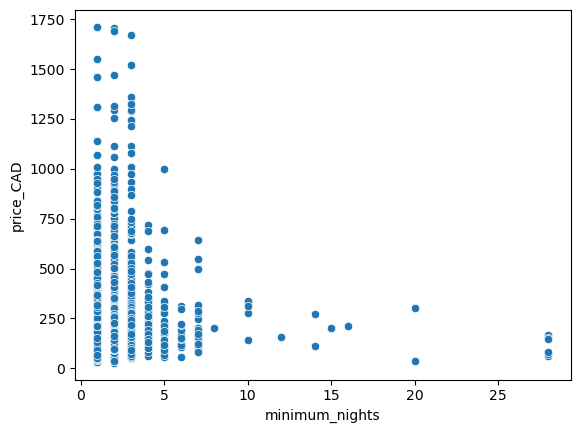

In [84]:
sns.scatterplot(x=df_tourism['minimum_nights'], y=df_tourism['price_CAD'])    

<Axes: xlabel='maximum_nights', ylabel='price_CAD'>

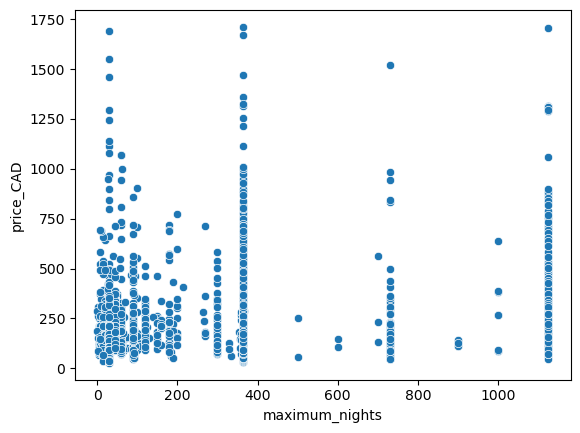

In [85]:
sns.scatterplot(x=df_tourism['maximum_nights'], y=df_tourism['price_CAD']) #for now, wont care about maximum_nights as it is not as relevant as minimum_nights

<Axes: xlabel='nbr_bedrooms', ylabel='price_CAD'>

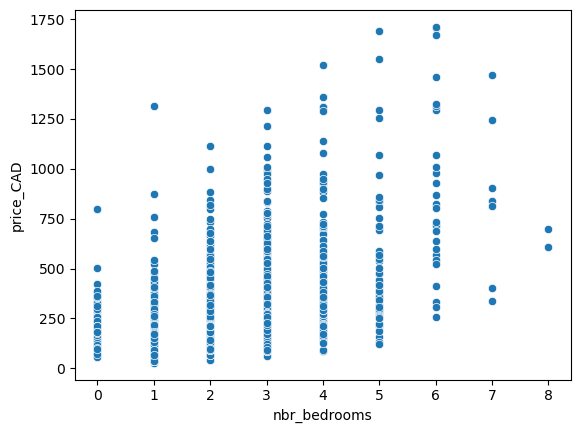

In [86]:
sns.scatterplot(x=df_tourism['nbr_bedrooms'], y=df_tourism['price_CAD'])

In [87]:
df_tourism[df_tourism['nbr_bedrooms'] >= 8]

,id,host_id,host_since,host_response_time_hours,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_name,latitude,longitude,property_type,room_type,nbr_accommodates,nbr_bathrooms,nbr_bedrooms,nbr_beds,list_amenities,price_CAD,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,nbr_of_reviews,nbr_of_reviews_ltm,nbr_of_reviews_l30d,availability_eoy,nbr_of_reviews_ly,estimated_occupancy_l365d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,has_license,has_review,host_response_rate_missing,host_response_time_missing,host_acceptance_rate_missing,nbr_amenities,has_sauna,has_gym,has_air_conditioning,has_heating,has_free_parking,has_pool,has_hot_tub,has_balcony,has_fireplace,has_elevator,has_view,has_dishwasher,is_entire_place,is_private_room,has_shared_bath,dist_to_PVM_km,hosting_years,log_price
470,9623570,6178250,2013-05-01,1.0,0.89,0.86,0.0,12,14,"['email', 'phone']",1,1,Le Sud-Ouest,45.49369,-73.561610,Entire home,Entire home/apt,16,5.0,8.0,10.0,"[""Hair dryer"", ""Wifi"", ""Indoor fireplace"", ""Pa...",700.0,1,1125,1.0,14,29,50,283,181,20,1,146,26,120,4.82,0,10,8,2,0,1.62,1,1,0,0,0,40,0,0,1,1,0,0,0,1,1,0,0,1,1,0,0,0.883024,12.131507,6.552508
9339,1415247048145044403,476854232,2022-08-26,1.0,1.00,0.98,1.0,7,8,"['email', 'phone']",1,1,Mercier-Hochelaga-Maisonneuve,45.55428,-73.532677,Entire rental unit,Entire home/apt,16,3.0,8.0,10.0,"[""Hair dryer"", ""Hot water kettle"", ""Pack \u201...",608.0,2,365,1.0,24,51,72,304,1,1,1,171,0,6,5.00,0,7,7,0,0,1.00,1,1,0,0,0,52,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,6.843289,2.805479,6.411818


<Axes: xlabel='nbr_bathrooms', ylabel='price_CAD'>

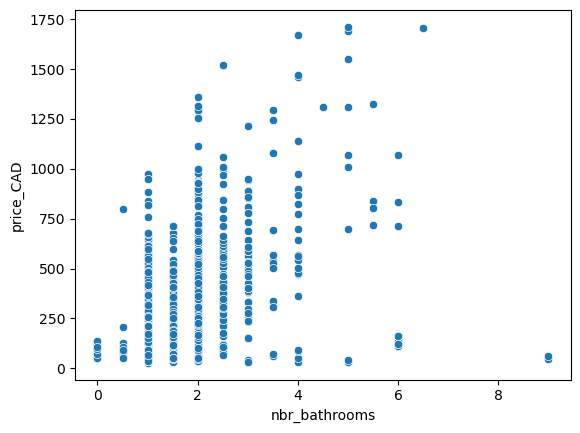

In [88]:
sns.scatterplot(x=df_tourism['nbr_bathrooms'], y=df_tourism['price_CAD'])

In [89]:
df_tourism[df_tourism['nbr_bathrooms'] > 8] #removing listings with 8 or more bathrooms as bc property_type = Room in Hotel
df_tourism = df_tourism[df_tourism['nbr_bathrooms'] <= 8]

df_tourism.shape

(3740, 67)

<Axes: xlabel='nbr_accommodates', ylabel='price_CAD'>

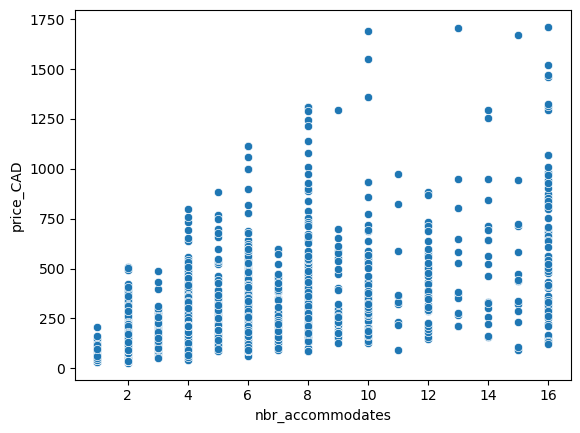

In [90]:
sns.scatterplot(x=df_tourism['nbr_accommodates'], y=df_tourism['price_CAD']) #many listings have 16+ accommodates 

In [91]:
df_tourism[df_tourism['nbr_accommodates']==16]['is_entire_place'].value_counts() #all listings with 16 accommodates are entire place

is_entire_place
1    63
0     7
Name: count, dtype: int64

In [92]:
df_tourism.columns

Index(['id', 'host_id', 'host_since', 'host_response_time_hours',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_name', 'latitude', 'longitude', 'property_type',
       'room_type', 'nbr_accommodates', 'nbr_bathrooms', 'nbr_bedrooms',
       'nbr_beds', 'list_amenities', 'price_CAD', 'minimum_nights',
       'maximum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'nbr_of_reviews', 'nbr_of_reviews_ltm', 'nbr_of_reviews_l30d',
       'availability_eoy', 'nbr_of_reviews_ly', 'estimated_occupancy_l365d',
       'review_scores_rating', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_

In [93]:
#has_amenity columns have become useless with df_tourism only have 0
amenity_cols = [
    "has_sauna", "has_gym", "has_air_conditioning", "has_heating", "has_free_parking",
    "has_pool", "has_hot_tub", "has_balcony", "has_fireplace", "has_elevator",
    "has_view", "has_dishwasher"
]

for col in amenity_cols:
    print(f"{col} value counts:")
    print(df_tourism[col].value_counts())
    print("-" * 30)

has_sauna value counts:
has_sauna
0    3707
1      33
Name: count, dtype: int64
------------------------------
has_gym value counts:
has_gym
0    3414
1     326
Name: count, dtype: int64
------------------------------
has_air_conditioning value counts:
has_air_conditioning
1    2880
0     860
Name: count, dtype: int64
------------------------------
has_heating value counts:
has_heating
1    3562
0     178
Name: count, dtype: int64
------------------------------
has_free_parking value counts:
has_free_parking
0    3118
1     622
Name: count, dtype: int64
------------------------------
has_pool value counts:
has_pool
0    3415
1     325
Name: count, dtype: int64
------------------------------
has_hot_tub value counts:
has_hot_tub
0    3616
1     124
Name: count, dtype: int64
------------------------------
has_balcony value counts:
has_balcony
0    2431
1    1309
Name: count, dtype: int64
------------------------------
has_fireplace value counts:
has_fireplace
0    3579
1     161
Name: co

In [94]:
df_tourism.shape

(3740, 67)

In [95]:
df_tourism.columns

Index(['id', 'host_id', 'host_since', 'host_response_time_hours',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_name', 'latitude', 'longitude', 'property_type',
       'room_type', 'nbr_accommodates', 'nbr_bathrooms', 'nbr_bedrooms',
       'nbr_beds', 'list_amenities', 'price_CAD', 'minimum_nights',
       'maximum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'nbr_of_reviews', 'nbr_of_reviews_ltm', 'nbr_of_reviews_l30d',
       'availability_eoy', 'nbr_of_reviews_ly', 'estimated_occupancy_l365d',
       'review_scores_rating', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_

In [96]:
df_tourism['room_type'].value_counts()

room_type
Entire home/apt    3223
Private room        492
Shared room          16
Hotel room            9
Name: count, dtype: int64

<Axes: >

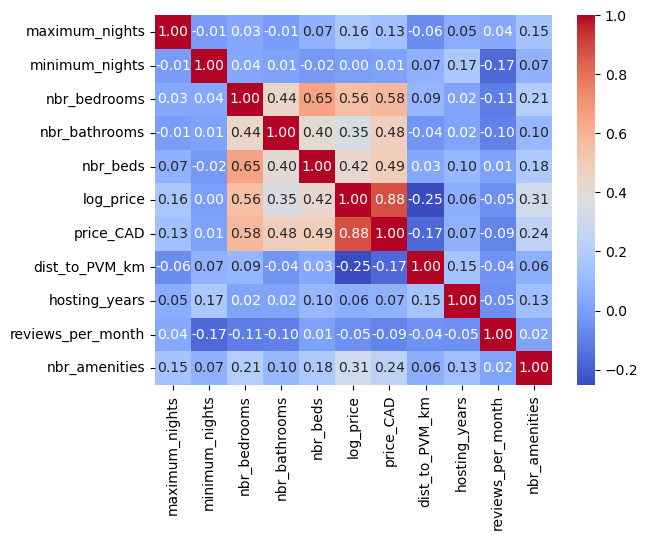

In [97]:
df_heatmap = df_tourism[['maximum_nights', 'minimum_nights', 'nbr_bedrooms', 'nbr_bathrooms', 'nbr_beds', 'log_price','price_CAD', 'dist_to_PVM_km', 'hosting_years', 'reviews_per_month', 'nbr_amenities']]
sns.heatmap(df_heatmap.corr(), annot=True, fmt=".2f", cmap="coolwarm")

In [98]:
df_tourism.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3740 entries, 1 to 9729
Data columns (total 67 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            3740 non-null   int64         
 1   host_id                                       3740 non-null   int64         
 2   host_since                                    3740 non-null   datetime64[ns]
 3   host_response_time_hours                      3740 non-null   float64       
 4   host_response_rate                            3740 non-null   float64       
 5   host_acceptance_rate                          3740 non-null   float64       
 6   host_is_superhost                             3740 non-null   float64       
 7   host_listings_count                           3740 non-null   int64         
 8   host_total_listings_count                     3740 non-null   int64      

In [99]:
df_tourism.to_csv('df_tourism_cleaned.csv', index=False) #save cleaned df to csv file for model creation file 